# 多区间滤波（不能用）

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# 生成示例音频数据
fs = 4000
t = np.linspace(0, 1, fs, endpoint=False)
audio_data = 0.5 * np.sin(2 * np.pi * 1209 * t) + 0.5 * np.sin(2 * np.pi * 697 * t)
fft_result_ori = fft(audio_data)
freq_ori = np.fft.fftfreq(len(fft_result_ori), 1/fs)
positive_freq_ori = freq_ori[:len(freq_ori)//2]
magnitude_spectrum_ori = np.abs(fft_result_ori[:len(fft_result_ori)//2])

plt.figure(figsize=(10, 2))
plt.plot(positive_freq_ori, magnitude_spectrum_ori)
plt.show()

# def dtmf_decode(audio_data, fs):
decoded_sequence = []

def design_multiband_filter(fs, bands):
    # Create a bank of bandpass filters
    filters = [signal.butter(4, [low, high], btype='band', fs=fs) for (low, high) in bands]

    return filters

def apply_multiband_filter(data, filters):
    # Apply each bandpass filter to the data
    filtered_data = [signal.filtfilt(b, a, data) for (b, a) in filters]

    return filtered_data

# 定义DTMF频率对应表
dtmf_freqs = {
    '1': (697, 1209),
    '2': (697, 1336),
    '3': (697, 1477),
    'A': (697, 1633),
    '4': (770, 1209),
    '5': (770, 1336),
    '6': (770, 1477),
    'B': (770, 1633),
    '7': (852, 1209),
    '8': (852, 1336),
    '9': (852, 1477),
    'C': (852, 1633),
    '*': (941, 1209),
    '0': (941, 1336),
    '#': (941, 1477),
    'D': (941, 1633),
}

# 设置滤波器参数
filter_order = 4
filter_bandwidth = 10

for key, (f1, f2) in dtmf_freqs.items():
    # 设计带通滤波器
    nyquist = 0.5 * fs
    low1 = f1 - filter_bandwidth
    high1 = f1 + filter_bandwidth
    low2 = f2 - filter_bandwidth
    high2 = f2 + filter_bandwidth
    frequency_bands = [(low1, high1), (low2, high2)]
    filters = design_multiband_filter(fs, frequency_bands)
    # b, a = signal.butter(filter_order, [low/nyquist, high/nyquist], btype='band')


    # 应用滤波器
    filtered_signal = apply_multiband_filter(audio_data, filters)

    # 计算幅度谱
    fft_result = fft(filtered_signal)
    freq = np.fft.fftfreq(len(fft_result), 1/fs)
    positive_freq = freq[:len(freq)//2]
    magnitude_spectrum = np.abs(fft_result[:len(fft_result)//2])

    #绘图
    plt.figure(figsize=(10, 2))
    plt.plot(positive_freq, magnitude_spectrum)
    plt.show()
    
    # 判断是否存在DTMF信号
    if np.max(magnitude_spectrum) > 10:
        decoded_sequence.append(key)

# return decoded_sequence

plt.figure(figsize=(10, 2))
plt.plot(t, audio_data)
plt.show
# 调用函数进行DTMF信号检测
# result = dtmf_decode(audio_data, fs)

# 输出结果
print("DTMF Decoded Sequence:", key)


In [ ]:
positive_freq_ori

# DTMF（可用）

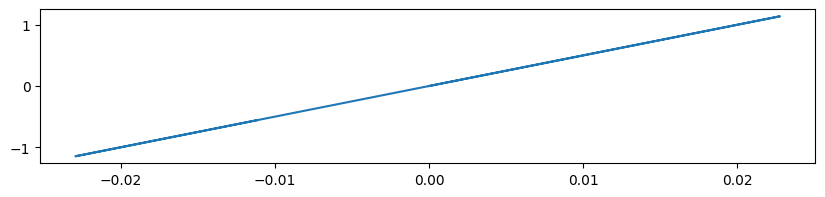

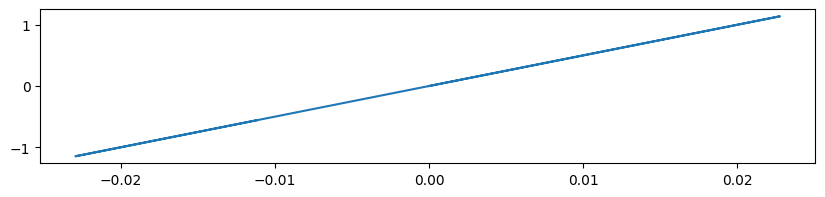

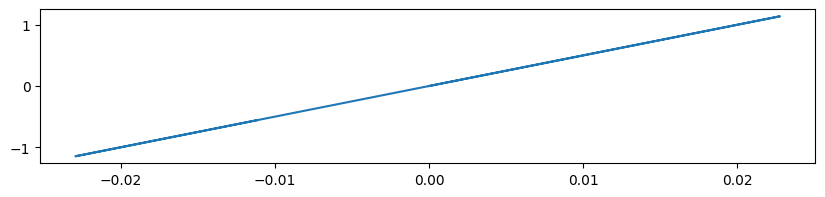

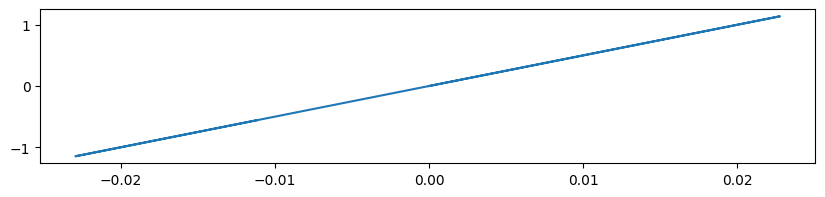

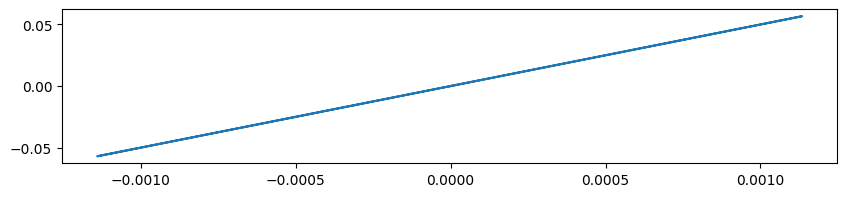

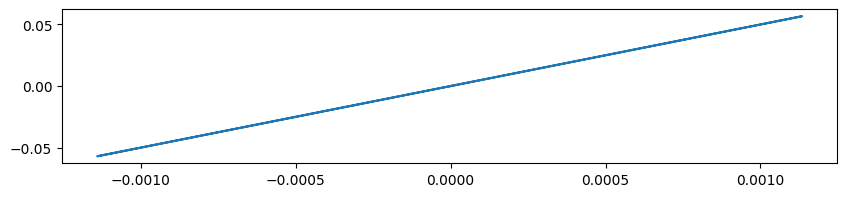

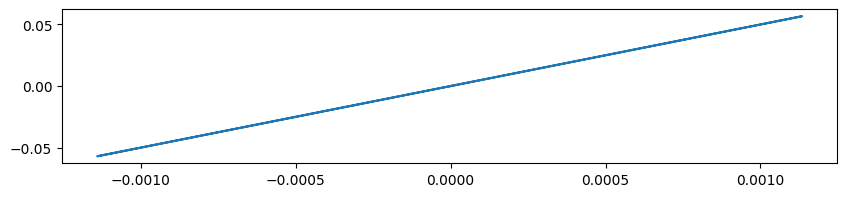

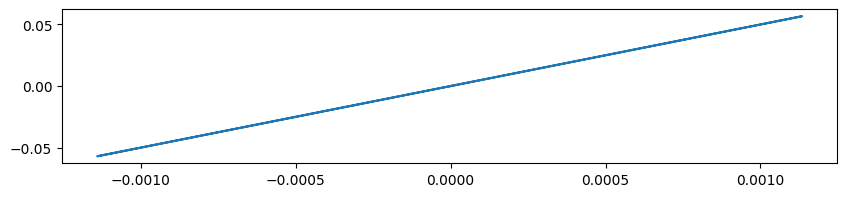

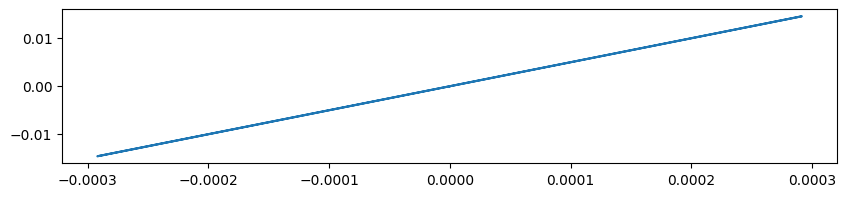

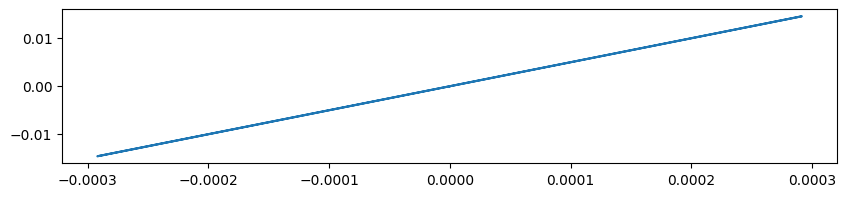

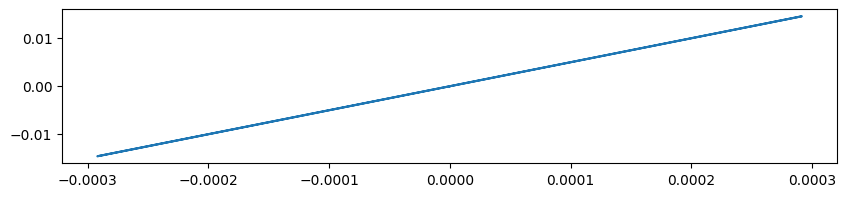

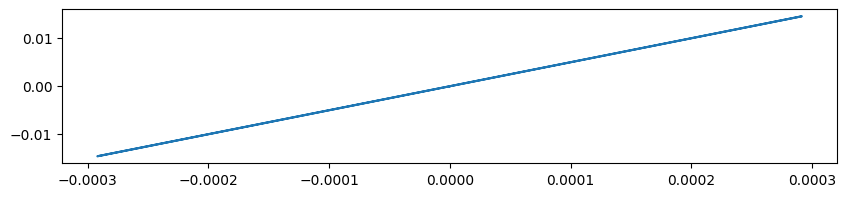

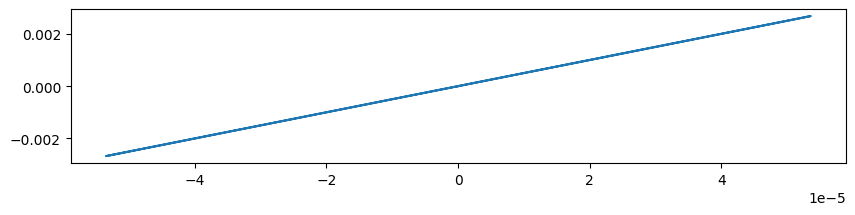

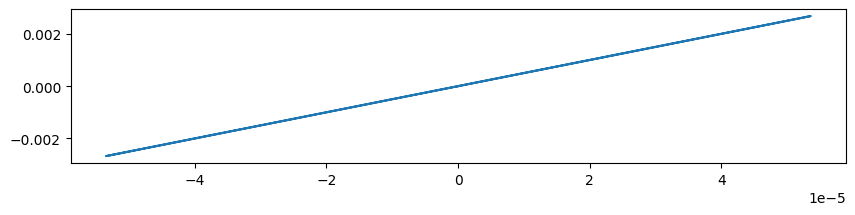

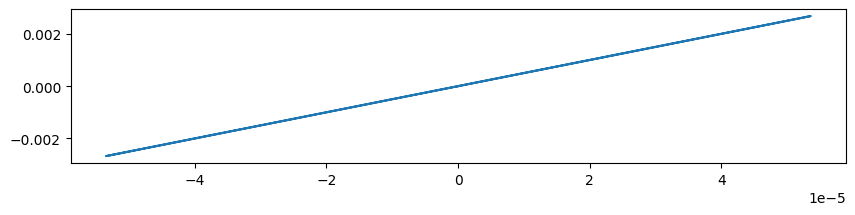

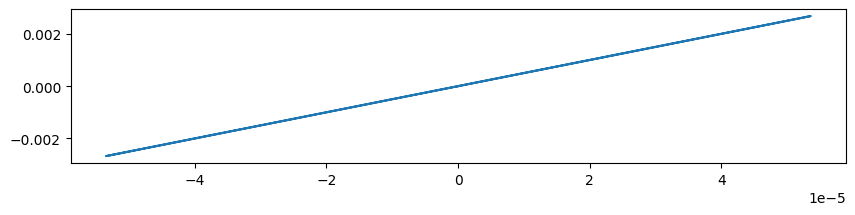

DTMF解码结果： [(697, 1209)]


In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.fftpack import fft

def butter_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def dtmf_decode(signal, fs):
    # 第一组频率
    freqs_group1 = [697, 770, 852, 941]
    # 第二组频率
    freqs_group2 = [1209, 1336, 1477, 1633]

    # 带宽范围及阈值
    bandwidth = 15
    threshold = 1

    # 解码结果
    decoded_digits = []

    for freq1 in freqs_group1:
        for freq2 in freqs_group2:
            # 对第一组频率进行滤波
            filtered_signal1 = butter_bandpass_filter(signal, freq1 - bandwidth, freq1 + bandwidth, fs)
            
            # 对第二组频率进行滤波
            filtered_signal2 = butter_bandpass_filter(signal, freq2 - bandwidth, freq2 + bandwidth, fs)

            # 绘图
            time = np.linspace(0, filtered_signal1,endpoint=False)
            plt.figure(figsize=(10, 2))
            plt.plot(time[1], filtered_signal1)
            plt.show()
            
            # 判断是否有信号
            if np.max(filtered_signal1) > 1 and np.max(filtered_signal2) > 1:
                # 将频率对解码为DTMF信号
                decoded_digits.append((freq1, freq2))

    return decoded_digits

# 用法示例
fs = 8000  # 采样率
duration = 1.0  # 信号时长（秒）
t = np.linspace(0, duration, int(fs * duration), endpoint=False)  # 时间点
signal = np.sin(2 * np.pi * 697 * t) + np.sin(2 * np.pi * 1209 * t)  # 模拟DTMF信号

decoded_result = dtmf_decode(signal, fs)
print("DTMF解码结果：", decoded_result)


# 实时读入

Recording and processing DTMF...


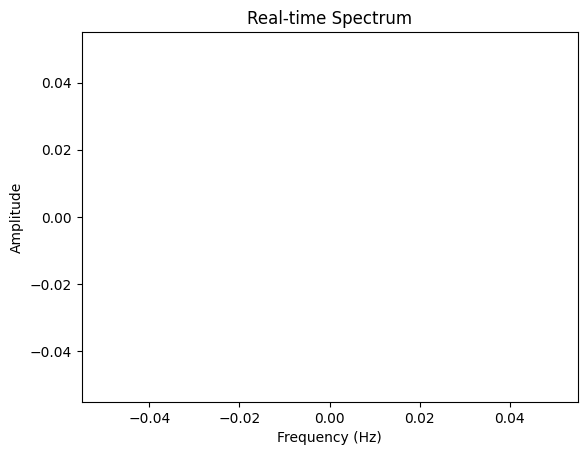

OSError: [Errno -9981] Input overflowed

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
from scipy.signal import butter, lfilter
import time

def butter_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def dtmf_decode(signal, fs):
    # 第一组频率
    freqs_group1 = [697, 770, 852, 941]
    # 第二组频率
    freqs_group2 = [1209, 1336, 1477, 1633]

    # 带宽范围
    bandwidth = 15

    # 解码结果
    decoded_digits = []

    for freq1 in freqs_group1:
        for freq2 in freqs_group2:
            # 对第一组频率进行滤波
            filtered_signal1 = butter_bandpass_filter(signal, freq1 - bandwidth, freq1 + bandwidth, fs)
            
            # 对第二组频率进行滤波
            filtered_signal2 = butter_bandpass_filter(signal, freq2 - bandwidth, freq2 + bandwidth, fs)

            # 判断是否有信号
            if any(filtered_signal1) and any(filtered_signal2):
                # 将频率对解码为DTMF信号
                decoded_digits.append((freq1, freq2))

    return decoded_digits

# 实时绘制频谱
def plot_spectrum(indata):
    spectrum = np.fft.fft(indata[:])
    f = np.fft.fftfreq(len(spectrum), 1.0/fs)
    
    # 显示频谱
    plt.clf()
    plt.plot(f, np.abs(spectrum))
    plt.title('Real-time Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.pause(0.1)

# 设置参数
fs = 44100  # 采样率
duration = 10.0  # 持续时间（秒）

# 存储编码结果的数组
encoded_results = []

# 在实时绘制频谱的同时处理每个块的DTMF解码
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                input=True,)
start_time = time.time()
print("Recording and processing DTMF...")
for _ in range(int(duration * fs)):
    block = np.frombuffer(stream.read(1), dtype=np.float32)
    encoded_results.extend(dtmf_decode(block, fs))
    plot_spectrum(block)

    current_time = time.time()
    elapsed_time = current_time - start_time
    if elapsed_time >= duration:
        break

# 输出编码结果
print("DTMF Encoding Results:", encoded_results)

# 关闭音频流和PyAudio
stream.stop_stream()
stream.close()
p.terminate()


In [ ]:
import pyaudio

p = pyaudio.PyAudio()

for i in range(p.get_device_count()):
    info = p.get_device_info_by_index(i)
    print(f"Index {i}: {info['name']}, {info['maxInputChannels']} input channels")
